In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [ ]:
!pip install XGboost

In [20]:
!pip install lightgbm

In [21]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
data = pd.read_csv('customer_purchase_data.csv')

In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


In [33]:
num_cols = data.shape[1]  # Get the number of columns
print(f"Number of columns: {num_cols}")

Number of columns: 9


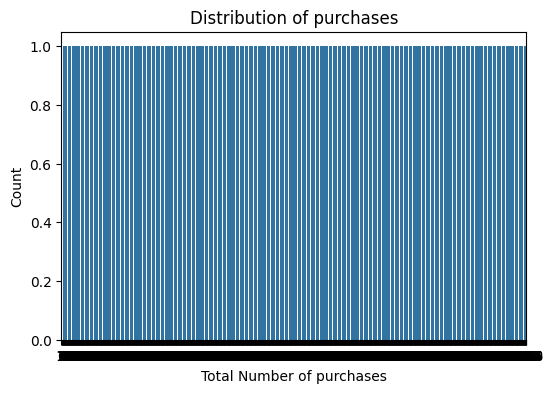

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data['NumberOfPurchases'])
plt.title("Distribution of purchases")
plt.xlabel("Total Number of purchases")
plt.ylabel("Count")
plt.show()

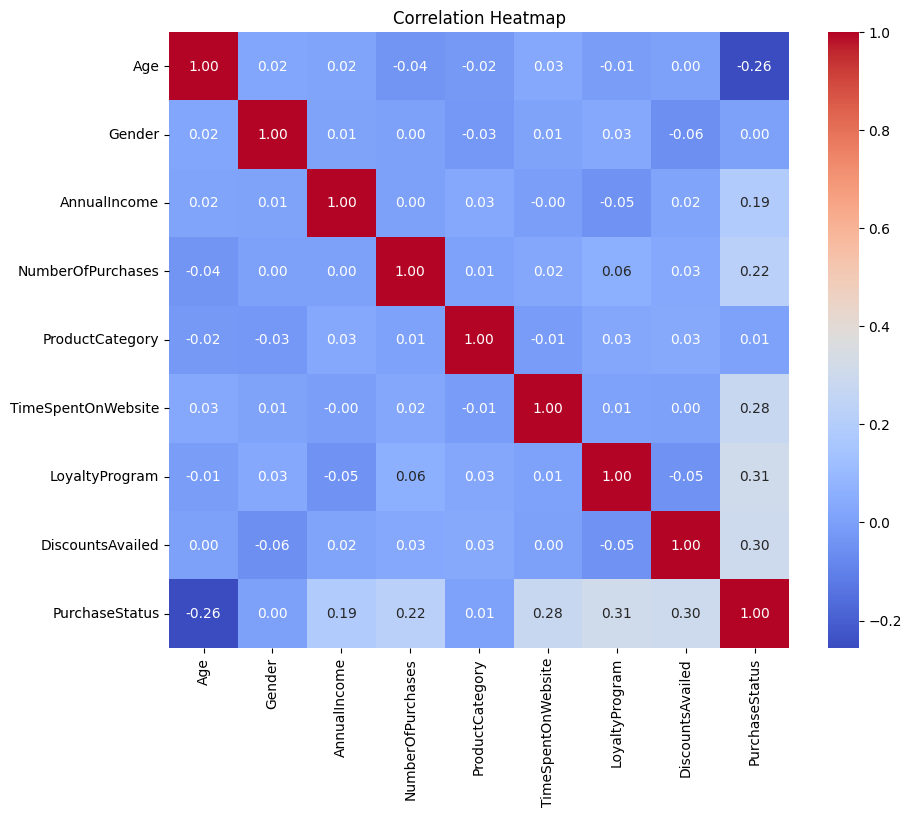

In [35]:
# Correlation heatmap for all numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
#Define features and target variable
x = data.drop('PurchaseStatus', axis=1)
y = data['PurchaseStatus']

In [8]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
#Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
#Logisitc Regression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(x_train, y_train)
log_reg_predictions = log_reg_model.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("Classification Report:\n", classification_report(y_test, log_reg_predictions))

Logistic Regression Accuracy: 0.8366666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       172
           1       0.88      0.72      0.79       128

    accuracy                           0.84       300
   macro avg       0.85      0.82      0.83       300
weighted avg       0.84      0.84      0.83       300



In [27]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Random Forest Score:", rf_model.score(x_test, y_test))

Random Forest Accuracy: 0.9533333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       172
           1       0.99      0.90      0.94       128

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300

Random Forest Score: 0.9533333333333334


In [13]:
#Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
svm_predictions = svm_model.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       172
           1       0.89      0.80      0.84       128

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.87      0.87      0.87       300



In [14]:
#Neural Network
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)

In [17]:
#Evaluate Neural Network
nn_predictions = (nn_model.predict(x_test) > 0.5).astype(int)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_predictions))
print("Classification Report:\n", classification_report(y_test, nn_predictions))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Neural Network Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88       172
           1       0.90      0.76      0.82       128

    accuracy                           0.86       300
   macro avg       0.87      0.85      0.85       300
weighted avg       0.86      0.86      0.86       300



In [22]:
#XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)
xgb_predictions = xgb_model.predict(x_test)
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))
#LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(x_train, y_train)
lgbm_predictions = lgbm_model.predict(x_test)
print("LightGBM Performance:")
print("Accuracy:", accuracy_score(y_test, lgbm_predictions))
print("Classification Report:\n", classification_report(y_test, lgbm_predictions))

XGBoost Performance:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       172
           1       0.98      0.90      0.94       128

    accuracy                           0.95       300
   macro avg       0.96      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300

[LightGBM] [Info] Number of positive: 520, number of negative: 680
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433333 -> initscore=-0.268264
[LightGBM] [Info] Start training from score -0.268264
LightGBM Performance:
Accuracy: 0.95
Classification Report:
  